# 103590450 四資四 馬茂源

In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import multivariate_normal, norm
import numpy as np
import itertools
import matplotlib.pyplot as plt

1 .	In the SOFM network, the learning rate is a function of time and distance between the current node and the BMU. If $𝜂_{0}$ = $𝜎_{0}$ = 0.1, 𝜆 = 10, find the number of required iteration such that the learning rate of nodes next to BMU is less than 0.001. A node is next to BMU is located at ($𝑥_{0}$ ± 1, $𝑦_{0}$) or ($𝑥_{0}$, $𝑦_{0}$ ± 1) where ($𝑥_{0}$, $𝑦_{0}$) as the coordinate of the BMU. 

In [2]:
lambda_ = 10
n = sigma = 0.1
t = 0

In [3]:
def get_lr(t, n, lambda_, sigma):
    n_t = n*np.exp(-t/lambda_)
    #sigma_t = sigma*np.exp(-(t/lambda_))
    #r_ij = np.exp(-1/(2*(sigma_t**2)))
    #print(sigma_t, -1/(2*(sigma_t**2)), np.exp(-1/(2*(sigma_t**2))))
    return n_t

In [4]:
lr = get_lr(t, n, lambda_, sigma)
while lr >= 0.001:
    t +=1
    lr = get_lr(t, n, lambda_, sigma)

In [5]:
t

47

2 .	We mentioned that the parameter $\alpha$ in GMM was computed based on the Lagrange multipliers. Show that   as given in the PPT notes. 

參閱附件

3 .	We have analytically solved the following problem: Maximize 𝑓(𝑥, 𝑦) = 𝑥 + 𝑦 subject to $𝑥^{2}$ + $𝑦^{2}$ = 1. Write a gradient descent program to find the solution numerically. Note that to find the maximum point, you need to follow the gradient (instead of negative gradient). Compare your numerical results with analytical results. 

In [6]:
def f(x):
    return x + np.sqrt(1 - x**2)

In [7]:
def derivative_f(x):
    return 1 - (x/np.sqrt(1-x**2))

In [8]:
x = 0
eta = 0.1
t = 0
X, Y = [x], [f(x)]
while np.abs(eta * derivative_f(x)) > 0.0001:
    x += eta * derivative_f(x)
    X.append(x)
    Y.append(f(x))
    t += 1

In [9]:
t

28

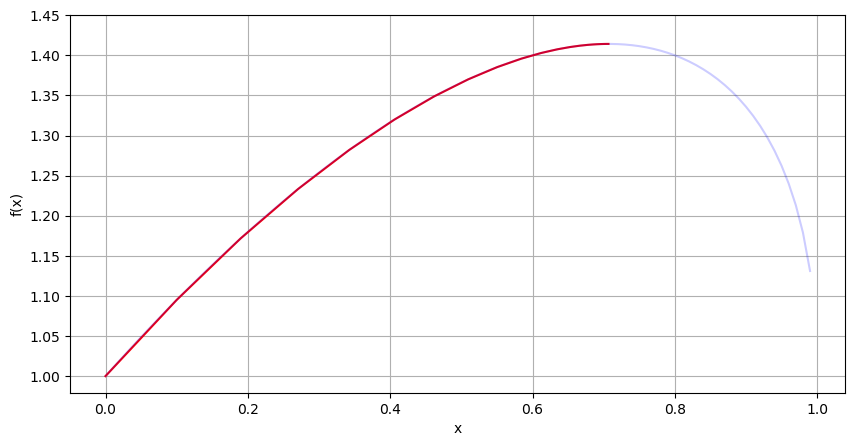

In [10]:
fig = plt.figure(figsize=(10, 5), dpi=100, facecolor='white')
plt.plot(X, Y, 'r')
plt.plot(np.arange(0, 1, 0.01), [f(i) for i in np.arange(0, 1, 0.01)], 'b', alpha= 0.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.yticks(np.arange(1, 1.5, 0.05))
plt.grid()
plt.show()

4 .	Compute the complete update (back propagation) equations for all weights (𝑤1 ~ 𝑤8) in the following neural networks. The activation function is sigmoid, the loss function is MSE, and the desired outputs are 𝑑1 and 𝑑2. 

![](1.png)

$\frac{\partial\varepsilon}{\partial w_{1}}$ = (y1 - d1)y1(1-y1)w5 h1(1-h1) x1 + (y2 - d2)y2(1-y2)w7 h1(1-h1) x1

$\frac{\partial\varepsilon}{\partial w_{2}}$ = (y1 - d1)y1(1-y1)w5 h1(1-h1) x2 + (y2 - d2)y2(1-y2)w7 h1(1-h1) x2

$\frac{\partial\varepsilon}{\partial w_{3}}$ = (y1 - d1)y1(1-y1)w6 h2(1-h2) x1 + (y2 - d2)y2(1-y2)w8 h2(1-h2) x1

$\frac{\partial\varepsilon}{\partial w_{4}}$ = (y1 - d1)y1(1-y1)w6 h2(1-h2) x2 + (y2 - d2)y2(1-y2)w8 h2(1-h2) x2

$\frac{\partial\varepsilon}{\partial w_{5}}$ = (y1 - d1)y1(1-y1)h1

$\frac{\partial\varepsilon}{\partial w_{6}}$ = (y1 - d1)y1(1-y1)h2

$\frac{\partial\varepsilon}{\partial w_{7}}$ = (y2 - d2)y2(1-y2)h1

$\frac{\partial\varepsilon}{\partial w_{8}}$ = (y2 - d2)y2(1-y2)h2

5 .	Write a program to implement the neural network with your back propagation equations in problem 4. To test your network, train it to distinguish the classes of versicolor and virginica in the Iris dataset using only the third and fourth features (i.e., petal length and petal width) as the inputs. As usual, use 70% of the data for training and the rest for testing. Repeat the experiments 10 times to find the average accuracy. During training, set the desired output as 0.9 for in class data and 0.1 for out of class data. Don’t forget to use random numbers as the initial weights. 

In [11]:
iris = load_iris()
feature_names = iris.feature_names.copy()
iris_X = iris.data
iris_y = iris.target
print(iris_X.shape, iris_y.shape)
iris.target_names

(150, 4) (150,)


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris_X = iris_X[50:, [2, 3]]
iris_y = iris_y[50:] - 1

In [13]:
class NN:
    def __init__(self, n_epoch=30):
        np.random.seed(42)
        self.W = np.random.random((2, 2, 2))
        self.n_epoch = n_epoch
        self.lr = 1
        self.enc = preprocessing.OneHotEncoder()
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, X):
        h = self._sigmoid(X.dot(self.W[0, :, :]))
        y = self._sigmoid(h.dot(self.W[1, :, :]))
        return y, h
    
    def bp(self, x, y_pred, y_true, H, lr):
        error = y_pred - y_true
        for each_x, each_error, each_y_pred, h in zip(x, error, y_pred, H):
            #print(each_x, each_error, each_y_pred)
            
            derivative_z_x = each_error*(each_y_pred*(1-each_y_pred))
            diff = h.reshape(-1, 1).dot(derivative_z_x.reshape(1, -1))
            self.W[1, :, :] = self.W[1, :, :] - lr*diff

            diff = (each_x.reshape(-1, 1)).dot((h.reshape(1, -1)[0])*((derivative_z_x).dot(self.W[1, :, :].T)).reshape(1, -1))
  
            self.W[0, :, :] = self.W[0, :, :] - lr*diff
            
    def fit(self, X, y):
        one_hot_y = self.enc.fit_transform(y.reshape(-1, 1)).toarray()
        
        for i in range(self.n_epoch):
            for x, y in zip(X, one_hot_y):
                y_pred, layer_output = self.predict(x.reshape(1, -1))
                self.bp(X, y_pred, y, layer_output, self.lr)
            
        return self
    
    def score(self, X, y):
        y_pred, _ = self.predict(X)
        # print(y_pred)
        return accuracy_score(y, np.argmax(y_pred, axis=1))

In [14]:
model = NN()
model.fit(iris_X - np.mean(iris_X, axis=0), iris_y)
model.score(iris_X - np.mean(iris_X, axis=0), iris_y)

0.94

In [15]:
acc = []
for i in range(10):
    model = NN()
    train_X, test_X, train_y, test_y = train_test_split(iris_X - np.mean(iris_X, axis=0), iris_y, train_size=0.7, 
                                                        test_size = 0.3)
    model.fit(train_X, train_y)
    acc.append(model.score(test_X, test_y))
print(acc)
print('avg acc: %.3f'%(np.mean(acc)))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
avg acc: 1.000
